In [2]:
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier


In [3]:
#  read the data in from files, 
#  assign target values 1 for signal, 0 for background
sigData = np.loadtxt('signal.txt')
nSig = sigData.shape[0]
sigTargets = np.ones(nSig)

bkgData = np.loadtxt('background.txt')
nBkg = bkgData.shape[0]
bkgTargets = np.zeros(nBkg)


In [4]:
# concatenate arrays into data X and targets y
X = np.concatenate((sigData,bkgData),0)
X = X[:,0:2]                       # at first, only use x1 and x2
y = np.concatenate((sigTargets, bkgTargets))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)


In [5]:
# Create classifier object and train
# Add code here to include other claassifiers (MLP, BDT,...)
clf = MLPClassifier(hidden_layer_sizes=(3,), activation='tanh',max_iter=2000, random_state=0)
clf.fit(X_train, y_train)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [5]:
# Evaluate accuracy using the test data.
# If available, use the decision function, else (e.g. for MLP) use predict_proba
# Adjust threshold value tCut or pMin as appropriate

In [6]:
X_bkg_test = X_test[y_test==0]
X_sig_test = X_test[y_test==1]
y_bkg_test = y_test[y_test==0]
y_sig_test = y_test[y_test==1]
# if hasattr(clf, "predict_proba"):
#     tCut = 0.
#     y_bkg_pred = (clf.decision_function(X_bkg_test) >= tCut).astype(bool)
#     y_sig_pred = (clf.decision_function(X_sig_test) >= tCut).astype(bool)
# else:
pMin = 0.9
y_bkg_pred = (clf.predict_proba(X_bkg_test)[:,1]  >= pMin).astype(bool)
y_sig_pred = (clf.predict_proba(X_sig_test)[:,1]  >= pMin).astype(bool)

In [7]:
power = metrics.accuracy_score(y_sig_test, y_sig_pred)        # = = Prob(t >= tCut|sig)
print('power of test with respect to signal = ', power)

#  Add code here to obtain the background efficiency
# = size of test alpha = = Prob(t >= tCut|bkg)


power of test with respect to signal =  0.6384985949417904


Text(0, 0.5, '$x_{2}$')

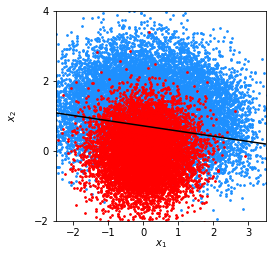

In [10]:
# make a scatter plot
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
ax.set_xlim((-2.5,3.5))
ax.set_ylim((-2,4))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))       # make square plot
xtick_spacing = 0.5
ytick_spacing = 2.0
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
plt.scatter(sigData[:,0], sigData[:,1], s=3, color='dodgerblue', marker='o')
plt.scatter(bkgData[:,0], bkgData[:,1], s=3, color='red', marker='o')
# add decision boundary to scatter plot
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# depending on classifier call predict_proba or decision_function
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, 1, colors='k')
plt.xlabel(r'$x_{1}$', labelpad=0)
plt.ylabel(r'$x_{2}$', labelpad=15)

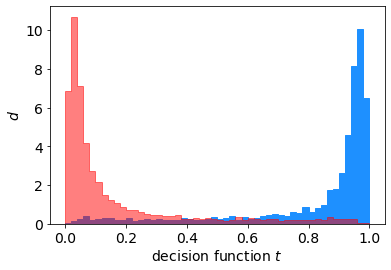

In [9]:
# make histogram of decision function
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict_proba(X_test)[:,1]
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg = tTest[y_test==0]
tSig = tTest[y_test==1]
nBins = 50
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
plt.xlabel('decision function $t$', labelpad=3)
plt.ylabel('$d$', labelpad=3)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=True, color='dodgerblue')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=True, color='red', alpha=0.5)
plt.savefig('1.png')
plt.show()